<a href="https://colab.research.google.com/github/KuriharaYoshiki/python_medical_images/blob/master/popipa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pythonを使って画像処理の基本を理解する

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###3.1 ピクセルから始める

3.1.1

<class 'numpy.ndarray'>


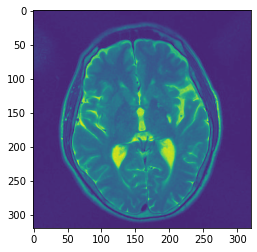

In [2]:
import cv2 #opencvをインポートする
import matplotlib.pyplot as plt #画像を表示するためにmatplotlibを使用する

#サンプル画像のMR_LEE_IR87a.jpgを利用
image=cv2.imread(filename='/content/drive/My Drive/DATASET/dataset/MR_LEE_IR87a.jpg',
                 flags=cv2.IMREAD_GRAYSCALE)
#画像を表示
plt.imshow(image)

print(type(image))

3.1.2

In [3]:
'''
リスト3.1.1のimage変数を引き続き利用する。
ピクセル位置を指定する。
例えば、x=100,y=100のピクセル値。
ただし、画像の座標は[0]から数えることに注意する。(マイナス1する)
'''
x=100
y=100
pixVal=image[x-1,y-1]
print(pixVal) #ピクセルを出力して確かめる。

70


3.1.3

In [4]:
#続き
#マトリクスサイズの確認
height,width=image.shape
#height,width,channels=image.shape #カラー画像の場合は受け手の変数が若干異なるので注意
print(width,height,'マトリクスサイズ(幅,高さ)')
print(type(image.shape))

320 320 マトリクスサイズ(幅,高さ)
<class 'tuple'>


###3.2 画像の標本化と量子化

3.2.1


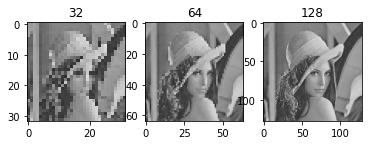

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

#サンプル画像としてlena-gray.pngを利用する
lena=cv2.imread('/content/drive/My Drive/DATASET/dataset/lena-gray.png')
resamples=[]
resamples.append(cv2.resize(lena,(32,32)))  #マトリクスサイズを変更する
resamples.append(cv2.resize(lena,(64,64)))
resamples.append(cv2.resize(lena,(128,128)))

for i in range(3):   #0,1,2
  plt.subplot(1,3,(1+i))  #領域を選択
  plt.title(str(2**(4+i+1)))  #タイトル
  plt.imshow(resamples[i],cmap="gray")
plt.show()

3.2.2


左から基準, FOV狭い,FOV広い


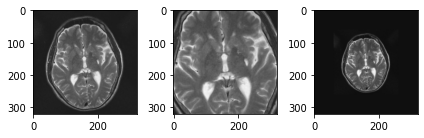

In [6]:
#基準画像(オリジナル)をロード
ref_img=cv2.imread(filename='/content/drive/My Drive/DATASET/dataset/MR_LEE_IR87a.jpg',
                   flags=cv2.IMREAD_GRAYSCALE)
h,w=ref_img.shape

#FOV狭い画像を模擬作成
#中央の200×200をクロップ
narrow=ref_img[59:259,59:259]
#マトリクスサイズをオリジナルに合わせる
narrow=cv2.resize(narrow,(w,h))

#FOVの広い画像を模擬作成
#オリジナルの左上隅の領域10×10の平均ピクセル値でバディングする
pad_v=ref_img[:10,:10] #オリジナルの左上隅の領域10×10
mean=np.uint8(np.mean(pad_v)) #平均ピクセル値
wide=np.zeros((512,512)) #320*320 to 512*512
#周囲をバディング
wide[:96,:]=mean  #[ : ]の場合は0番目から最後までを取る
wide[416:512,:]=mean
wide[:,:96]=mean
wide[:,416:512]=mean
#中心の320×320を元画像で埋める
wide[96:416,96:416]=np.copy(ref_img)
#マトリクスサイズをオリジナルに合わせる
wide=cv2.resize(wide,(w,h))
#画像をリストにまとめる
images=[ref_img,narrow,wide]
print("左から基準, FOV狭い,FOV広い")
for i in range(3):
  plt.subplot(1,3,(1+i))
  plt.imshow(images[i],cmap='gray')
  plt.tight_layout() #重なりや空白を自動調整する

Memo  
有効視野の大きさはピクセルの大きさで決まる
ピクセルの大きさは格子間距離で決まる  
→ピクセルスペーシング  
標本化→量子化  
量子化：アナログ信号をデジタル信号に変換する

3.2.3


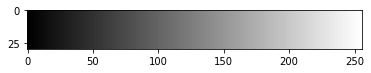

In [7]:
pixels=np.zeros((30,256))
for i in range(256):
  col=np.zeros(30)
  col=np.uint8(i)
  pixels[:,i]=col
  plt.imshow(pixels,cmap='gray')

3.2.4

In [8]:
print(np.iinfo(np.int8))  #signed Byte(8-bit)
#その他のレンジを調べる方法
print(np.iinfo(np.int16))  #signed Byte(16-bit)
print(np.iinfo(np.int32))  #signed Byte(32-bit)
print(np.iinfo(np.int64))  #signed Byte(64-bit)

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



3.2.5


In [9]:
num=np.uint8(0)  #type of unsigned byte(0 to 255)
print(num) #0
num255=np.uint8(255)
print(num255)  #255
overFlow=np.uint8(0-1) # -1にならず一周回って255に
print(overFlow)


0
255
255


###3.3 シングルチャンネル画像とマルチチャンネル画像

LUT:Look Up Table  
入力色データに対応する出力色データを参照する(Look Up)対応表(Table)

3.3.1

In [10]:
import cv2

#カラー画像をロード
bgr=cv2.imread('/content/drive/My Drive/DATASET/dataset/lena-rgb.png',
               flags=cv2.IMREAD_UNCHANGED)
#BGRカラーをRGBに変換する
rgb=cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

#グレースケール画像をロード
gray=cv2.imread('/content/drive/My Drive/DATASET/dataset/lena-gray.png',
                flags=cv2.IMREAD_UNCHANGED)

#カラーチャンネルを調べる
#ndarrayのshapeから調べる
#カラー画像の場合
height,width,channel=rgb.shape
print(height,width,channel)
#グレースケールの場合
height,width=gray.shape
print(height,width)

#ピクセル値から直接調べる
rgb100=rgb[100,100,:]  #[行の位置,列の位置,カラーチャンネル]
gray100=gray[100,100]  #[行の位置,列の位置]
#出力して確認
print("color pixel",rgb100)
print("8-bit gray pixel",gray100)

512 512 3
512 512
color pixel [178  68  78]
8-bit gray pixel 108


Memo  
画像処理の1つにカラー画像をグレースケールに変換する処理がある。  
→RGBの平均値などをRGB全ての要素に代入し直すことで表現できる。

3.3.22


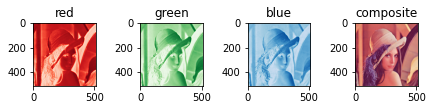

In [11]:
import matplotlib.pyplot as plt
import numpy as np

bgr=cv2.imread("/content/drive/My Drive/DATASET/dataset/lena-rgb.png",
               cv2.IMREAD_UNCHANGED)
rgb=cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)

#RGB成分の分解
images=[]
r_channel=rgb[:,:,0]
g_channel=rgb[:,:,1]
b_channel=rgb[:,:,2]
images.append(r_channel)
images.append(g_channel)
images.append(b_channel)
#print(images)
#画像を表示して確かめる
for i in range(3):
  plt.subplot(1,4,(i+1))
  plt.tight_layout()
  if i==0:
    plt.title("red")
    plt.imshow(images[i],cmap="Reds")
  if i==1:
    plt.title("green")
    plt.imshow(images[i],cmap="Greens")
  if i==2:
    plt.title("blue")
    plt.imshow(images[i],cmap="Blues")
#元に戻す(合成)
#元に戻すにはRGB順にシングルチャンネルを持つ多次元配列を作ればよい
pixels=np.uint8(np.zeros((512,512,3)))
pixels[:,:,0]=r_channel
pixels[:,:,1]=g_channel
pixels[:,:,2]=b_channel
plt.subplot(1,4,4)
plt.title("composite")
plt.imshow(pixels)



3.3.2

bgr=cv2.imread("/content/drive/My Drive/DATASET/dataset/lena-rgb.png",cv2.IMREAD_UNCHANGED)
rgb=cv2.cvtColor(bgr,cv2.COLOR_BGRGB) #BGRをRGBオーダーに変換

###3.4 画像のリサイズ


In [12]:
import cv2
#画像のロードとオリジナル画像サイズの確認
chest=cv2.imread('/content/drive/My Drive/DATASET/dataset/ChestXray.png',
                 cv2.IMREAD_GRAYSCALE)
print("オリジナルサイズ",chest.shape)
#リサイズ3000を256へ
chest256=cv2.resize(src=chest,dsize=(256,256),
                    interpolation=cv2.INTER_LINEAR)
print("ダウンサンプリング1",chest256.shape)
#係数でサイズを変更することもできる(1/10にする例)
img300=cv2.resize(chest,dsize=None,fx=0.1,fy=0.1,
      interpolation=cv2.INTER_LINEAR)
print("ダウンサンプリング2",img300.shape)


オリジナルサイズ (3000, 3000)
ダウンサンプリング1 (256, 256)
ダウンサンプリング2 (300, 300)


3.4.2

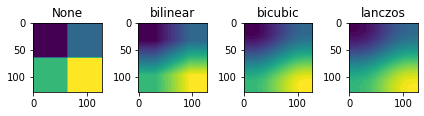

In [13]:
#OpenCVで利用可能なピクセル補間法を試す
import numpy as np
import matplotlib.pyplot as plt
#2*2ピクセル画像(8-bit)を作成
pix=np.zeros((2,2))
pix[0,0]=10
pix[0,1]=20
pix[1,0]=30
pix[1,1]=40
pix=np.uint8(pix) #8-bit化
#OpenCVで利用可能な補間法を利用して128×128にアップサンプリング(拡大)
#インターニアレスト(補間なし)
internearest=cv2.resize(src=pix,dsize=(128,128),
                        interpolation=cv2.INTER_NEAREST)
plt.subplot(1,4,1)
plt.title("None")
plt.imshow(internearest)
#バイリニア
linear=cv2.resize(src=pix,dsize=(128,128),
                  interpolation=cv2.INTER_LINEAR)
plt.subplot(1,4,2)
plt.title("bilinear")
plt.imshow(linear)
#バイキュービック
cubic=cv2.resize(src=pix,dsize=(128,128),
                  interpolation=cv2.INTER_CUBIC)
plt.subplot(1,4,3)
plt.title("bicubic")
plt.imshow(cubic)
#ランチョス
lanczos=cv2.resize(src=pix,dsize=(128,128),
                  interpolation=cv2.INTER_LANCZOS4)
                  #4という数字はSinc関数のすそ野の広がりの大きさ
plt.subplot(1,4,4)
plt.title("lanczos")
plt.imshow(lanczos)
plt.tight_layout()
plt.show()


###3.5 画像階調のリスケール(ダウンスケールとアップスケール)

3.5.1

original data type (512, 512) uint16
original min and max 30720 34516
down-scaled(8-bit) min and max 0 255
up-scaled(16-bit) min and max 0 255 255
[[30720 30720 30720 ... 30720 30720 30720]
 [30720 30720 30720 ... 30720 30720 30720]
 [30720 30720 30720 ... 30720 30720 30720]
 ...
 [30720 30720 30720 ... 30720 30720 30720]
 [30720 30720 30720 ... 30720 30720 30720]
 [30720 30720 30720 ... 30720 30720 30720]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


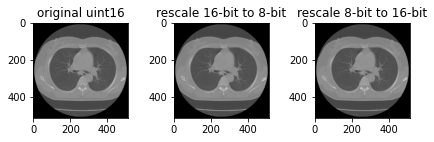

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ct=cv2.imread('/content/drive/My Drive/DATASET/dataset/CT_LEE_IR87a-NOCAL.png',
              cv2.IMREAD_UNCHANGED)
#原画像のデータタイプを確認
print("original data type",ct.shape,ct.dtype)
print("original min and max",np.amin(ct),np.amax(ct))
plt.subplot(1,3,1)
plt.tight_layout()
plt.title("original "+str(ct.dtype))
plt.imshow(ct,cmap="gray")

#rescale(16-bitを8-bitへdown-scaleする)
#先にピクセル値を0-255の範囲に変換する。
amin=np.amin(ct)
amax=np.amax(ct)
#print(ct)
#print(type(ct))
#print(type(amin))
scale=255.0/(amax-amin)  #255.0/(34516-30720)
values=((ct-amin)*scale) #0...
#print(values)
#print(values<0)
values[values<0]=0
values[values>255]=255
pixelsInt8=np.uint8(values)
#print(pixelsInt8)
print("down-scaled(8-bit) min and max",np.amin(pixelsInt8),
      np.amax(pixelsInt8))
plt.subplot(1,3,2)
plt.tight_layout()
plt.title("rescale 16-bit to 8-bit")
plt.imshow(pixelsInt8,cmap="gray")

#up-scale(8-bitを16-bitへup-scaleする)(非可逆)
#8-bitの数値のままアップスケールする
pixelsInt16=np.uint16(pixelsInt8)
print("up-scaled(16-bit) min and max",
      np.amin(pixelsInt16),np.amax(pixelsInt16),np.amax(pixelsInt16))
plt.subplot(1,3,3)
plt.tight_layout()
plt.title("rescale 8-bit to 16-bit")
plt.imshow(pixelsInt16,cmap="gray")
print(ct)
print(pixelsInt16)

###3.6 画像のヒストグラム

3.6.1

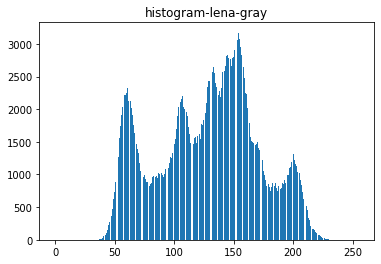

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#load lena-gray
lena_gray=cv2.imread(filename="/content/drive/My Drive/DATASET/dataset/lena-gray.png",
                     flags=cv2.IMREAD_GRAYSCALE)
#get histogram
hist,bins=np.histogram(lena_gray,256,[0,256])
#show graph
h=[h for h in range(len(hist))]
plt.bar(h,hist)
plt.title("histogram-lena-gray")
plt.show()


3.6.2

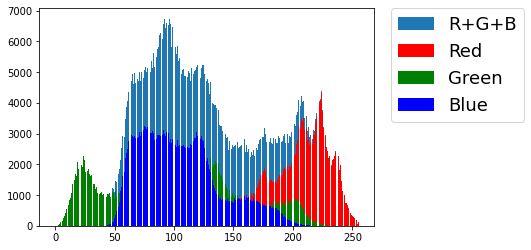

In [16]:
#load lena
lena_bgr=cv2.imread(filename="/content/drive/My Drive/DATASET/dataset/lena-rgb.png",
                    flags=cv2.IMREAD_COLOR)
rgb=cv2.cvtColor(lena_bgr, cv2.COLOR_BGR2RGB)
#ヒストグラムを作成して表示
#R+G+B
hist_RGB,bins=np.histogram(a=rgb.flatten(),bins=256,range=[0,256])
#ヒストグラムのbins数を取得
h=[h for h in range(len(hist))]
plt.bar(h,hist_RGB,label="R+G+B")
#R
hist_R,bins=np.histogram(a=rgb[:,:,0],bins=256,range=[0,256])
plt.bar(h,hist_R,color="r",label="Red")
#G
hist_G,bins=np.histogram(a=rgb[:,:,1],bins=256,range=[0,256])
plt.bar(h,hist_G,color="g",label="Green")
#B
hist_B,bins=np.histogram(a=rgb[:,:,2],bins=256,range=[0,256])
plt.bar(h,hist_B,color="b",label="Blue")
#レジェンド(凡例)を設定
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0,
           fontsize=18)
plt.show()

###3.7 画像のコントラスト

3.7.1

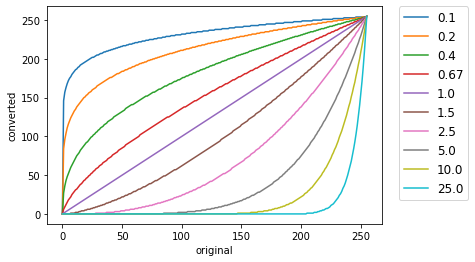

In [17]:
#ガンマ値をリスト化
gammalist=np.array([0.1,0.2,0.4,0.67,1,1.5,2.5,5,10,25])
#ガンマ値ごとに関数を計算して表示する
for gamma in gammalist:
  var_px=np.empty(256,np.uint8)
  for i in range(256):
    var_px[i]=np.clip(pow(i/255.0,gamma)*255.0,0,255)
  plt.plot(var_px,label=str(gamma))
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',
           borderaxespad=0,fontsize=12)
plt.xlabel("original")
plt.ylabel("converted")
plt.show()

3.7.2

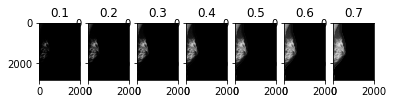

In [18]:
#ガンマ値の変数(仮で初期値を設定)
gamma=1.0
#処理対象の画像をロード
pixels=cv2.imread("/content/drive/My Drive/DATASET/dataset/MG_MLO_L_LEE_IR87a.png",
                  cv2.IMREAD_UNCHANGED)
#16-bit画像であるため一旦8-bitへダウンスケール
amin=np.amin(pixels)
amax=np.amax(pixels)
scale=255.0/(amax-amin)  
values=((pixels-amin)*scale)
values=np.clip(values,0,255) #0<=pixels<=255へ
img=np.uint8(values) #準備完了

#ガンマカーブを使って階調変換する関数
def gamma_correction(gamma):
  #ガンマ値を使ってLUTを作成
  lookUpTabel=np.empty((1,256),np.uint8)
  for i in range(256):
    lookUpTabel[0,i]=np.clip(pow(i/255.0,1./gamma)*255.0,0,255)
    #lookUpTabel[0,i]=np.clip(pow(i/255.0,gamma)*255.0,0,255)
    #for white background
  return lookUpTabel

for i in [1,2,3,4,5,6,7]:
  gamma=round(i*0.1,2)
  #LUTメソッドを使って画像の輝度値を変換
  imgA=cv2.LUT(img,gamma_correction(gamma))
  plt.subplot(1,7,i)
  plt.imshow(imgA,cmap="gray")
  plt.title(str(gamma))
plt.show()

###3.8 ピクセル(ボクセル)のキャリブレーション(校正)

3.8.1

In [19]:
#オヒルギの長径と短径を求める
import plotly.express as px
import cv2
#表示画像上にカーソルをあて、ピクセル位置を確認すること
bgr=cv2.imread("/content/drive/My Drive/DATASET/dataset/Ohirugi-1.png",
               cv2.IMREAD_UNCHANGED)
rgb=cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
fig=px.imshow(rgb)
fig.show()

'''
ピクセル位置を画像上のカーソル情報から取得しておくこと
コインの上端と下端のピクセル位置をそれぞれ調べると、
(258,164)(258,251)であったとすると
コインの直径のピクセル数は次のように求められる
'''
import math
coin_len=math.sqrt((258-258)**2+(251-164)**2)
print("100円玉の直径ピクセル値",coin_len)

#長径の上端と下端のピクセル位置を画像上のカーソルから取得する
#長径のピクセル位置(上下)は(170,70),(258,342)とした場合
longAxesPix=math.sqrt((258-170)**2+(342-70)**2)
print("長軸ピクセル数",longAxesPix)

#次は短径を(135,210),(256,167)とした場合
shortAxesPix=math.sqrt((256-135)**2+(167-210)**2)
print("短軸ピクセル数",longAxesPix)

#1ピクセルあたりの距離
pixspace=22.6/coin_len #単位は[mm]

#オヒルギの長径と短径
print("長径[cm]",longAxesPix*pixspace/10,"短径[cm]",shortAxesPix*pixspace/10)

100円玉の直径ピクセル値 87.0
長軸ピクセル数 285.8810941632902
短軸ピクセル数 285.8810941632902
長径[cm] 7.426336469069378 短径[cm] 3.3357962363707534


###3.9 画像の演算

3.9.1


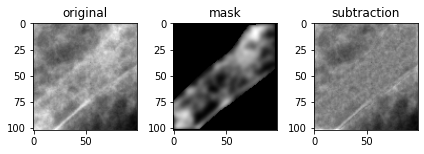

In [20]:
import matplotlib.pyplot as plt
import cv2
#ChestCropとChestCrop-RibMaskWithGaussianのロード
img=cv2.imread('/content/drive/My Drive/DATASET/dataset/ChestCrop.tif',
               cv2.IMREAD_UNCHANGED)
mask=cv2.imread('/content/drive/My Drive/DATASET/dataset/ChestCrop-RibMaskWithGaussian.tif',
                cv2.IMREAD_UNCHANGED)
#ChestCropからChestCrop-RibMaskWithGaussianを差分する
sub=img-mask
#肋骨の影響が抑制できているか確認する
plt.subplot(1,3,1),plt.imshow(img,cmap='gray'),plt.title("original")
plt.subplot(1,3,2),plt.imshow(mask,cmap='gray'),plt.title("mask")
plt.subplot(1,3,3),plt.imshow(sub,cmap='gray'),plt.title("subtraction")
plt.tight_layout()
plt.show()

###3.10 画像と周波数(2次元フーリエ変換)

3.10.1

In [21]:
import plotly.express as px
import numpy as np
import cv2
import pandas as pd

#ChestXray256_uint8.pngを利用
pix=cv2.imread("/content/drive/My Drive/DATASET/dataset/ChestXray256_uint8.png",
               cv2.IMREAD_GRAYSCALE)

#画像空間の波を捉える位置(128行目)に線を引いて確認
pix_line=cv2.rectangle(np.copy(pix),(0,128-1),(256,128-1),(0,255,0),3)
fig=px.imshow(pix_line,color_continuous_scale='gray')
fig.show()
#中央の行のピクセル配列を取得
c_row=pix[128-1,:]
#折れ線グラフへ
data={'intensity':c_row,
      'col':np.linspace(0,255,256)}
df=pd.DataFrame(data=data)
fig=px.line(df,x='col',y='intensity',title='pixel intensities at row128')
fig.show()

3.10.2

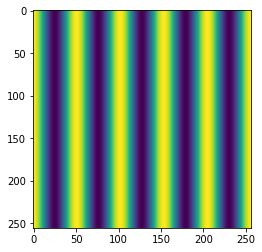

In [23]:
from scipy .fft import idct
#縞のある画像を作成
a=np.zeros((256,256)) #任意の正方形に
a[0,10]=1
base=idct(idct(a,axis=0),axis=1) #周期性のある2次元配列を離散コサイン変換で求める
plt.imshow(base)  #idct→離散コサイン変換
plt.show()

#中央の行を取得しライングラフへ
row128=base[128-1,:]
data={'intensity':row128,"col":np.linspace(0,255,256)}
df=pd.DataFrame(data=data)
fig=px.line(df,x="col",y="intensity",title='pixel intensities at row128')
fig.show()

3.10.3

In [24]:
from numpy.fft import fft
#リスト3.10.1胸部の行データを使用する
x=c_row
#フーリエ変換を実施
freq=fft(x)
#結果を絶対値で取得(結果が複素数で返ってくるため)
freq_abs=np.abs(freq) #fft result
'''
グラフにして、左右のシンメトリーになることを確認
ナイキスト周波数の位置(N/2)以降が虚像(pretense)
特殊な操作であるが、虚像をわかりやすくするために配列の前半と後半を入れ替える
'''
swap=np.zeros(256)
swap[:128]=freq_abs[128:256]
swap[128]=freq_abs[0]
swap[129:]=freq_abs[1:128]
#グラフ用のデータへ
data={'freq':swap,"size":np.linspace(0,255,256)}
df=pd.DataFrame(data=data)
#シンメトリーをグラフへ
fig=px.line(df,x="size",y='freq',title="fft result with the pretense at row128")
fig.show()
'''
実際の計算にはナイキスト周波数の位置(N/2)以降の虚像部分は不要
ナイキスト周波数の位置(N/2)までをグラフへ
この例ではN=256のため、その位置は128
'''
data={"freq":freq_abs[0:128],'size':np.linspace(0,128,128)}
df=pd.DataFrame(data=data)
fig=px.line(df,x="size",y='freq',title="fft result with the pretense at row128")
fig.show()

3.10.4

In [25]:
#再び胸部の128行目のピクセル配列を利用
x=c_row
#ナイキスト周波数までを取得(それ以降は虚像のため不要)
freq=fft(x)[0:128]
freq_max=np.max(np.abs(freq))

N=len(freq) #データ数
n=np.arange(N) #1きざみの配列をN個

#各周波数をsin波の信号に変換
wave_arr=[]
name_arr=[]
location_arr=[]
for i in range(N):
  norm=np.abs(freq[i])/freq_max #正規化
  freq_sin_wave=np.sin(np.abs(freq[i])*2*np.pi*(n/N))*norm
  name=["freq"+str(i)]*N
  if i <16: #16番目までの低周波数成分を可視化
    wave_arr.extend(freq_sin_wave)
    name_arr.extend(name)
    location_arr.extend(n)
#グラフデータへ
data={"amplitude":wave_arr,"sampling location":location_arr,"freq":name_arr}
df=pd.DataFrame(data=data)
fig=px.line_3d(df,x="sampling location",y="freq",z="amplitude",color="freq")
fig.show()